In [2]:
import pickle

import numpy as np


In [3]:
from nn_labs.image_net.load import load_fashion_mnist

(X_train, Y_train), (X_test, Y_test) = load_fashion_mnist()

In [4]:
from nn_labs.nn.network import AutoEncoderNetwork

network: AutoEncoderNetwork = pickle.load(open("/Users/philip/code/uni/nn/nn_labs/image_net/models/fresh-morning-10", "rb"))
encoder = network.as_encoder()

In [5]:
Y_test.max()

9

In [6]:
predictions = network.forward(X_test)
predictions = predictions.reshape(-1, 28, 28) * 255
encoded_values = encoder.forward(X_test) * 255

true_y = X_test.reshape(-1, 28, 28) * 255

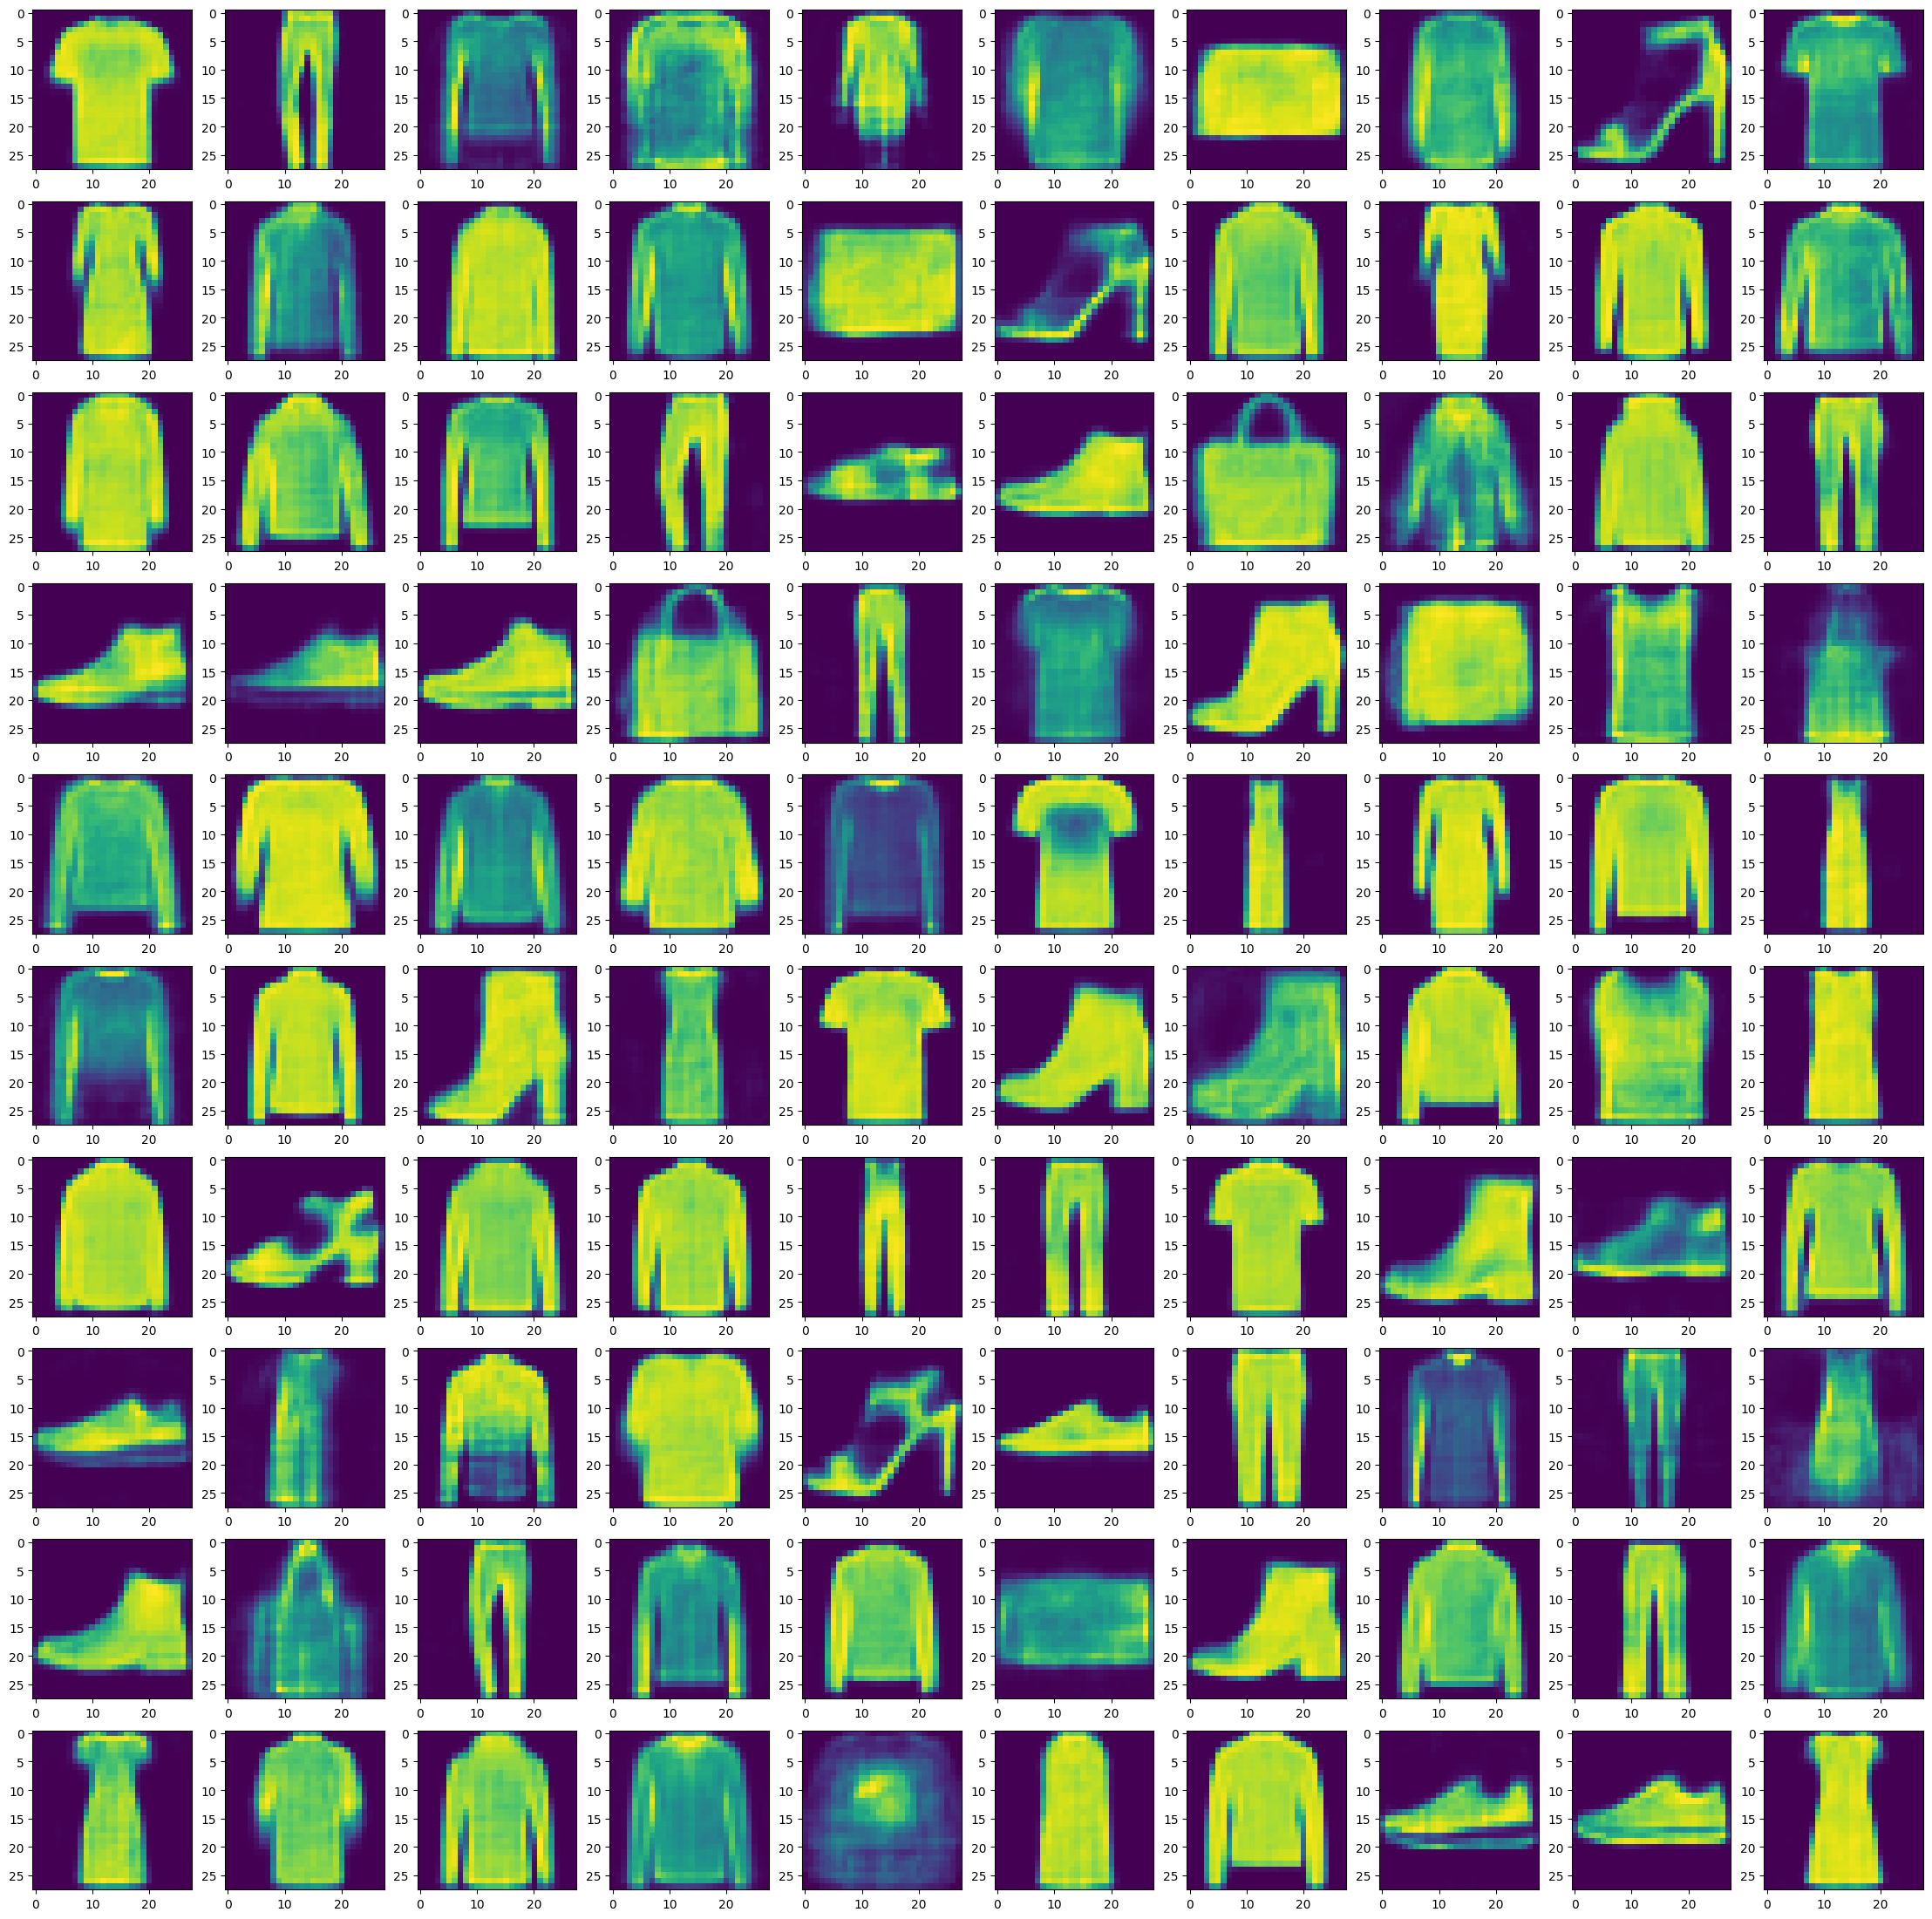

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(28,28))

for i,ax in enumerate(axes.flat):
    ax.imshow(predictions[i])

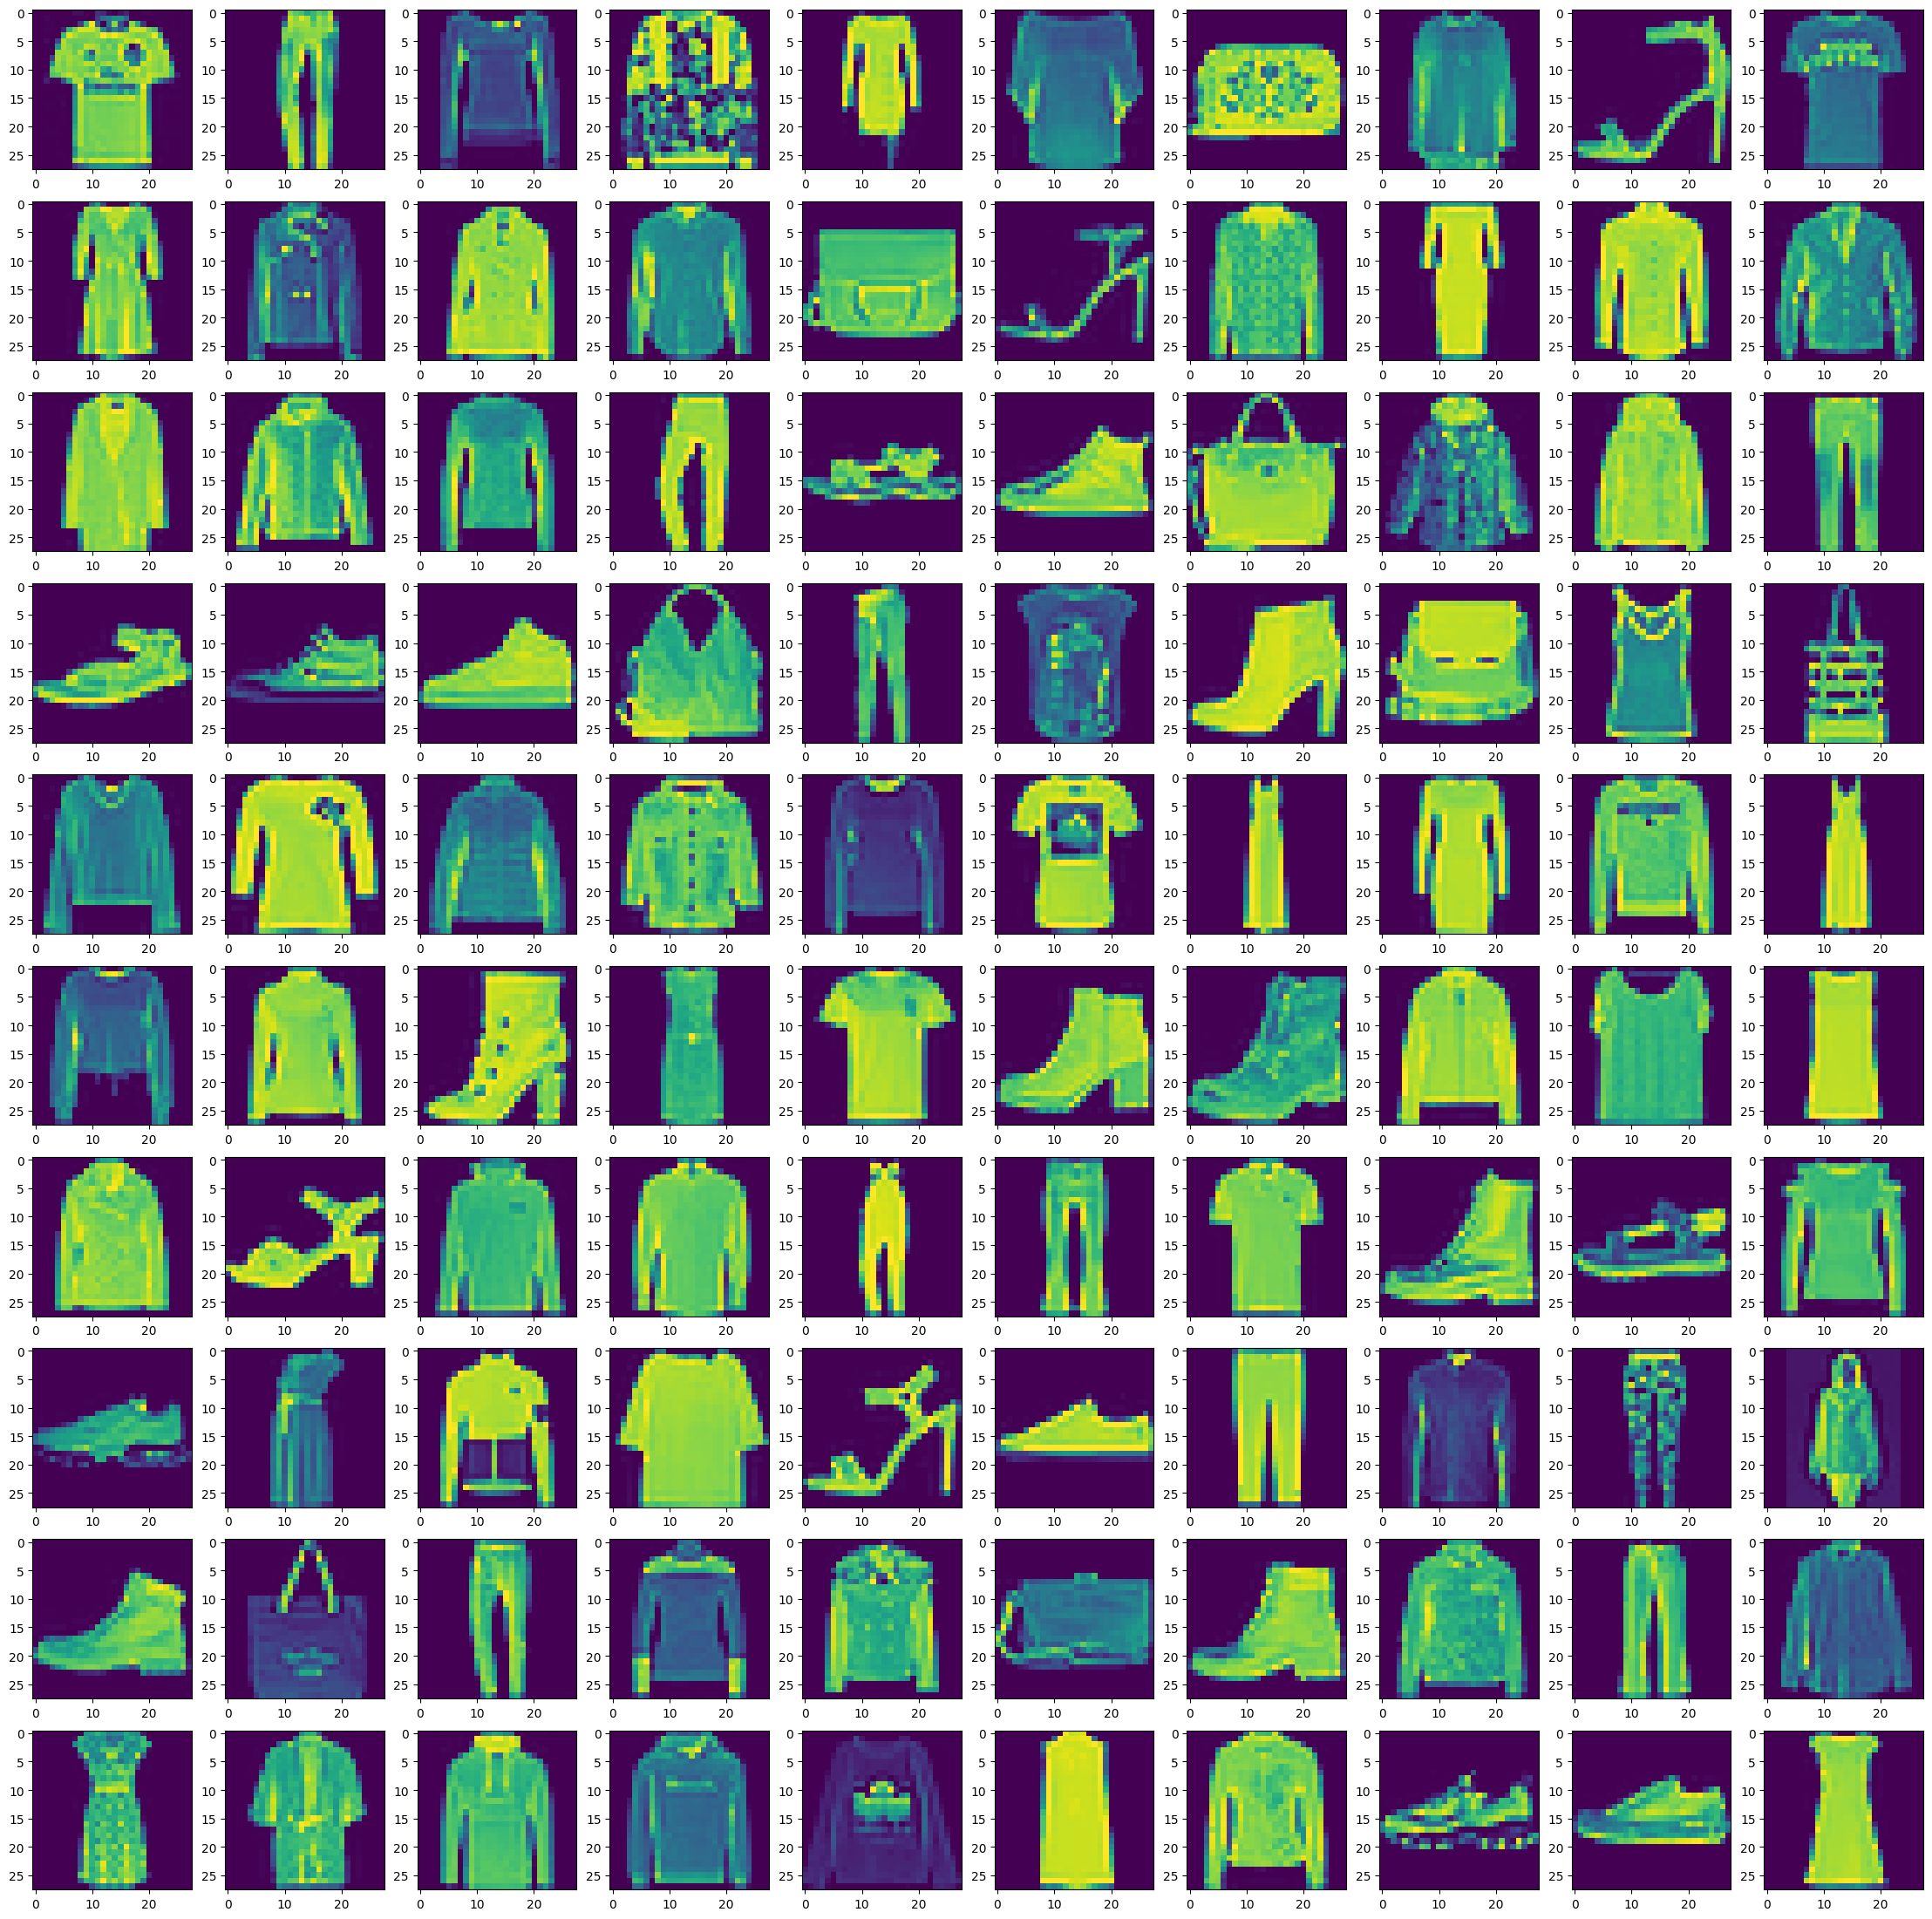

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(28,28))

for i,ax in enumerate(axes.flat):
    ax.imshow(true_y[i])

/Users/philip/code/uni/nn/.venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


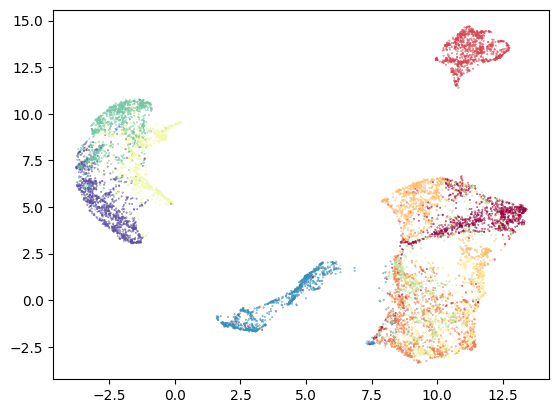

In [9]:
import umap

compressed_x = encoder.forward(X_test)

standard_embedding = umap.UMAP(random_state=42).fit_transform(compressed_x)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=Y_test, s=0.1, cmap='Spectral');

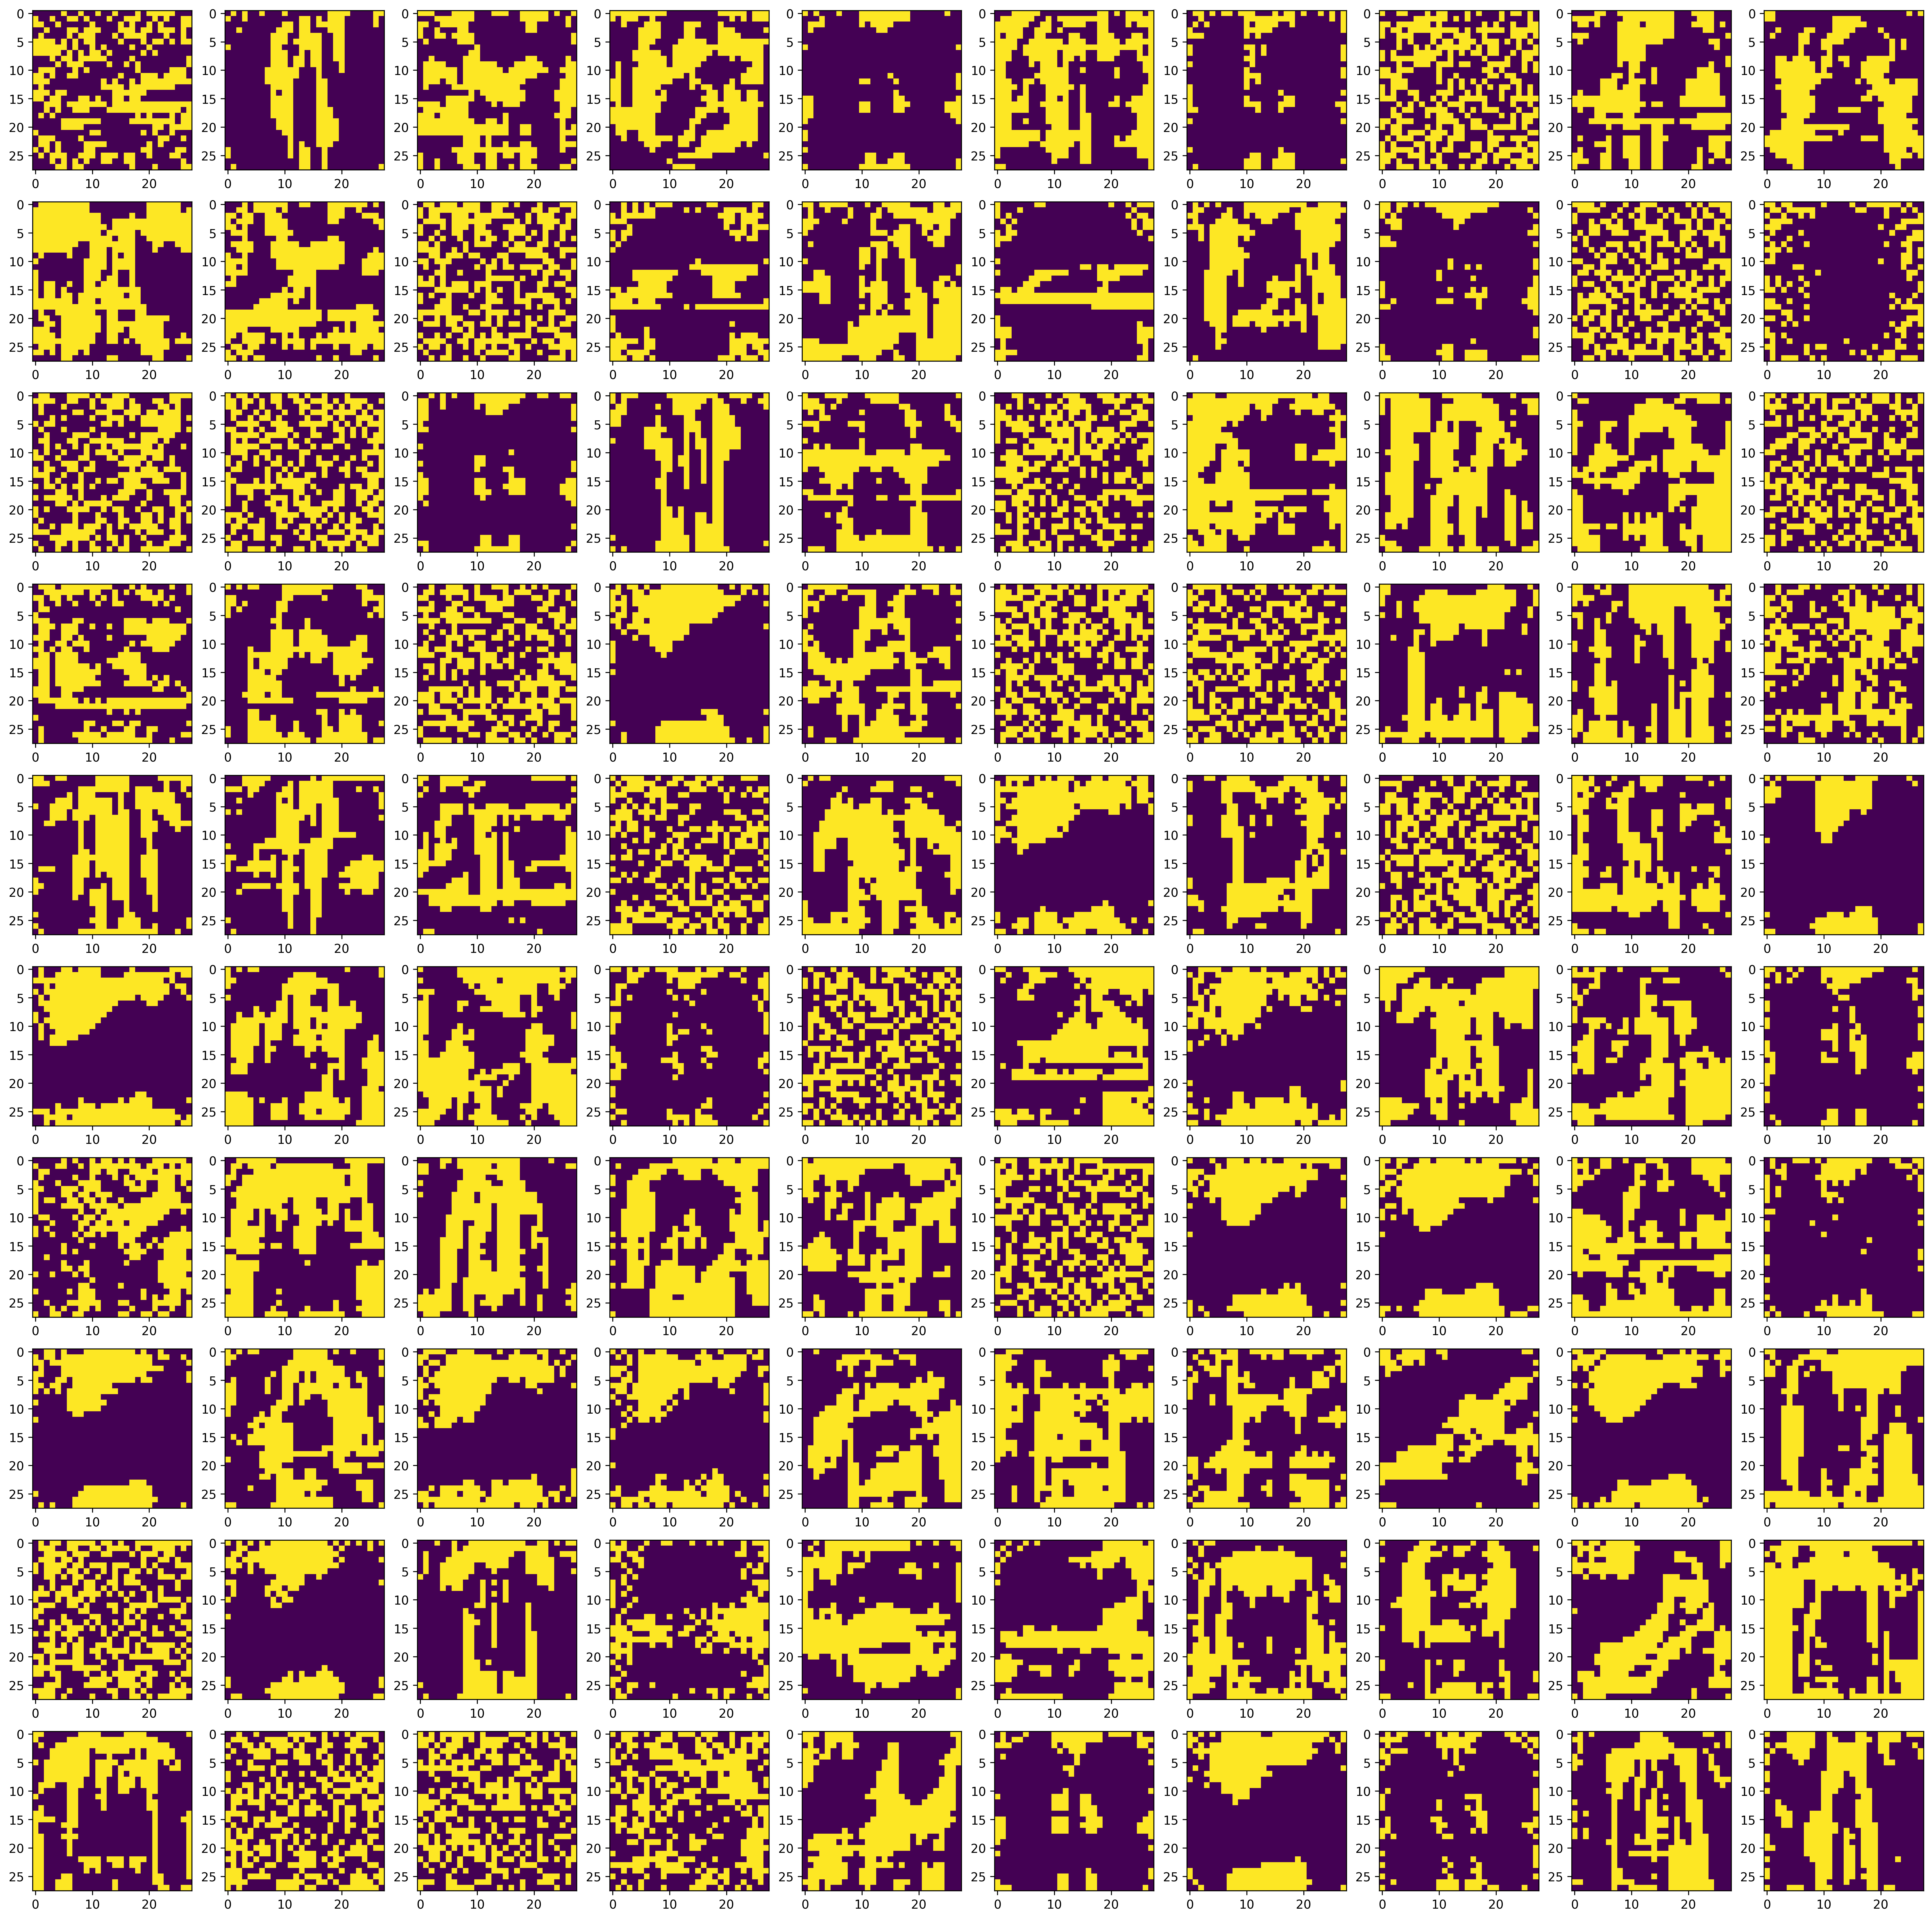

In [59]:
neuron_number = 0

layer = encoder.layers[0].weights
fig, axes = plt.subplots(10,10, figsize=(28,28))

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


for i,ax in enumerate(axes.flat):
    values = layer.T[i]
    z = (values / np.sqrt(values.T * values) * 127) + 127
    x = ax.imshow(z.reshape(28, 28))

0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0
0.0 254.0


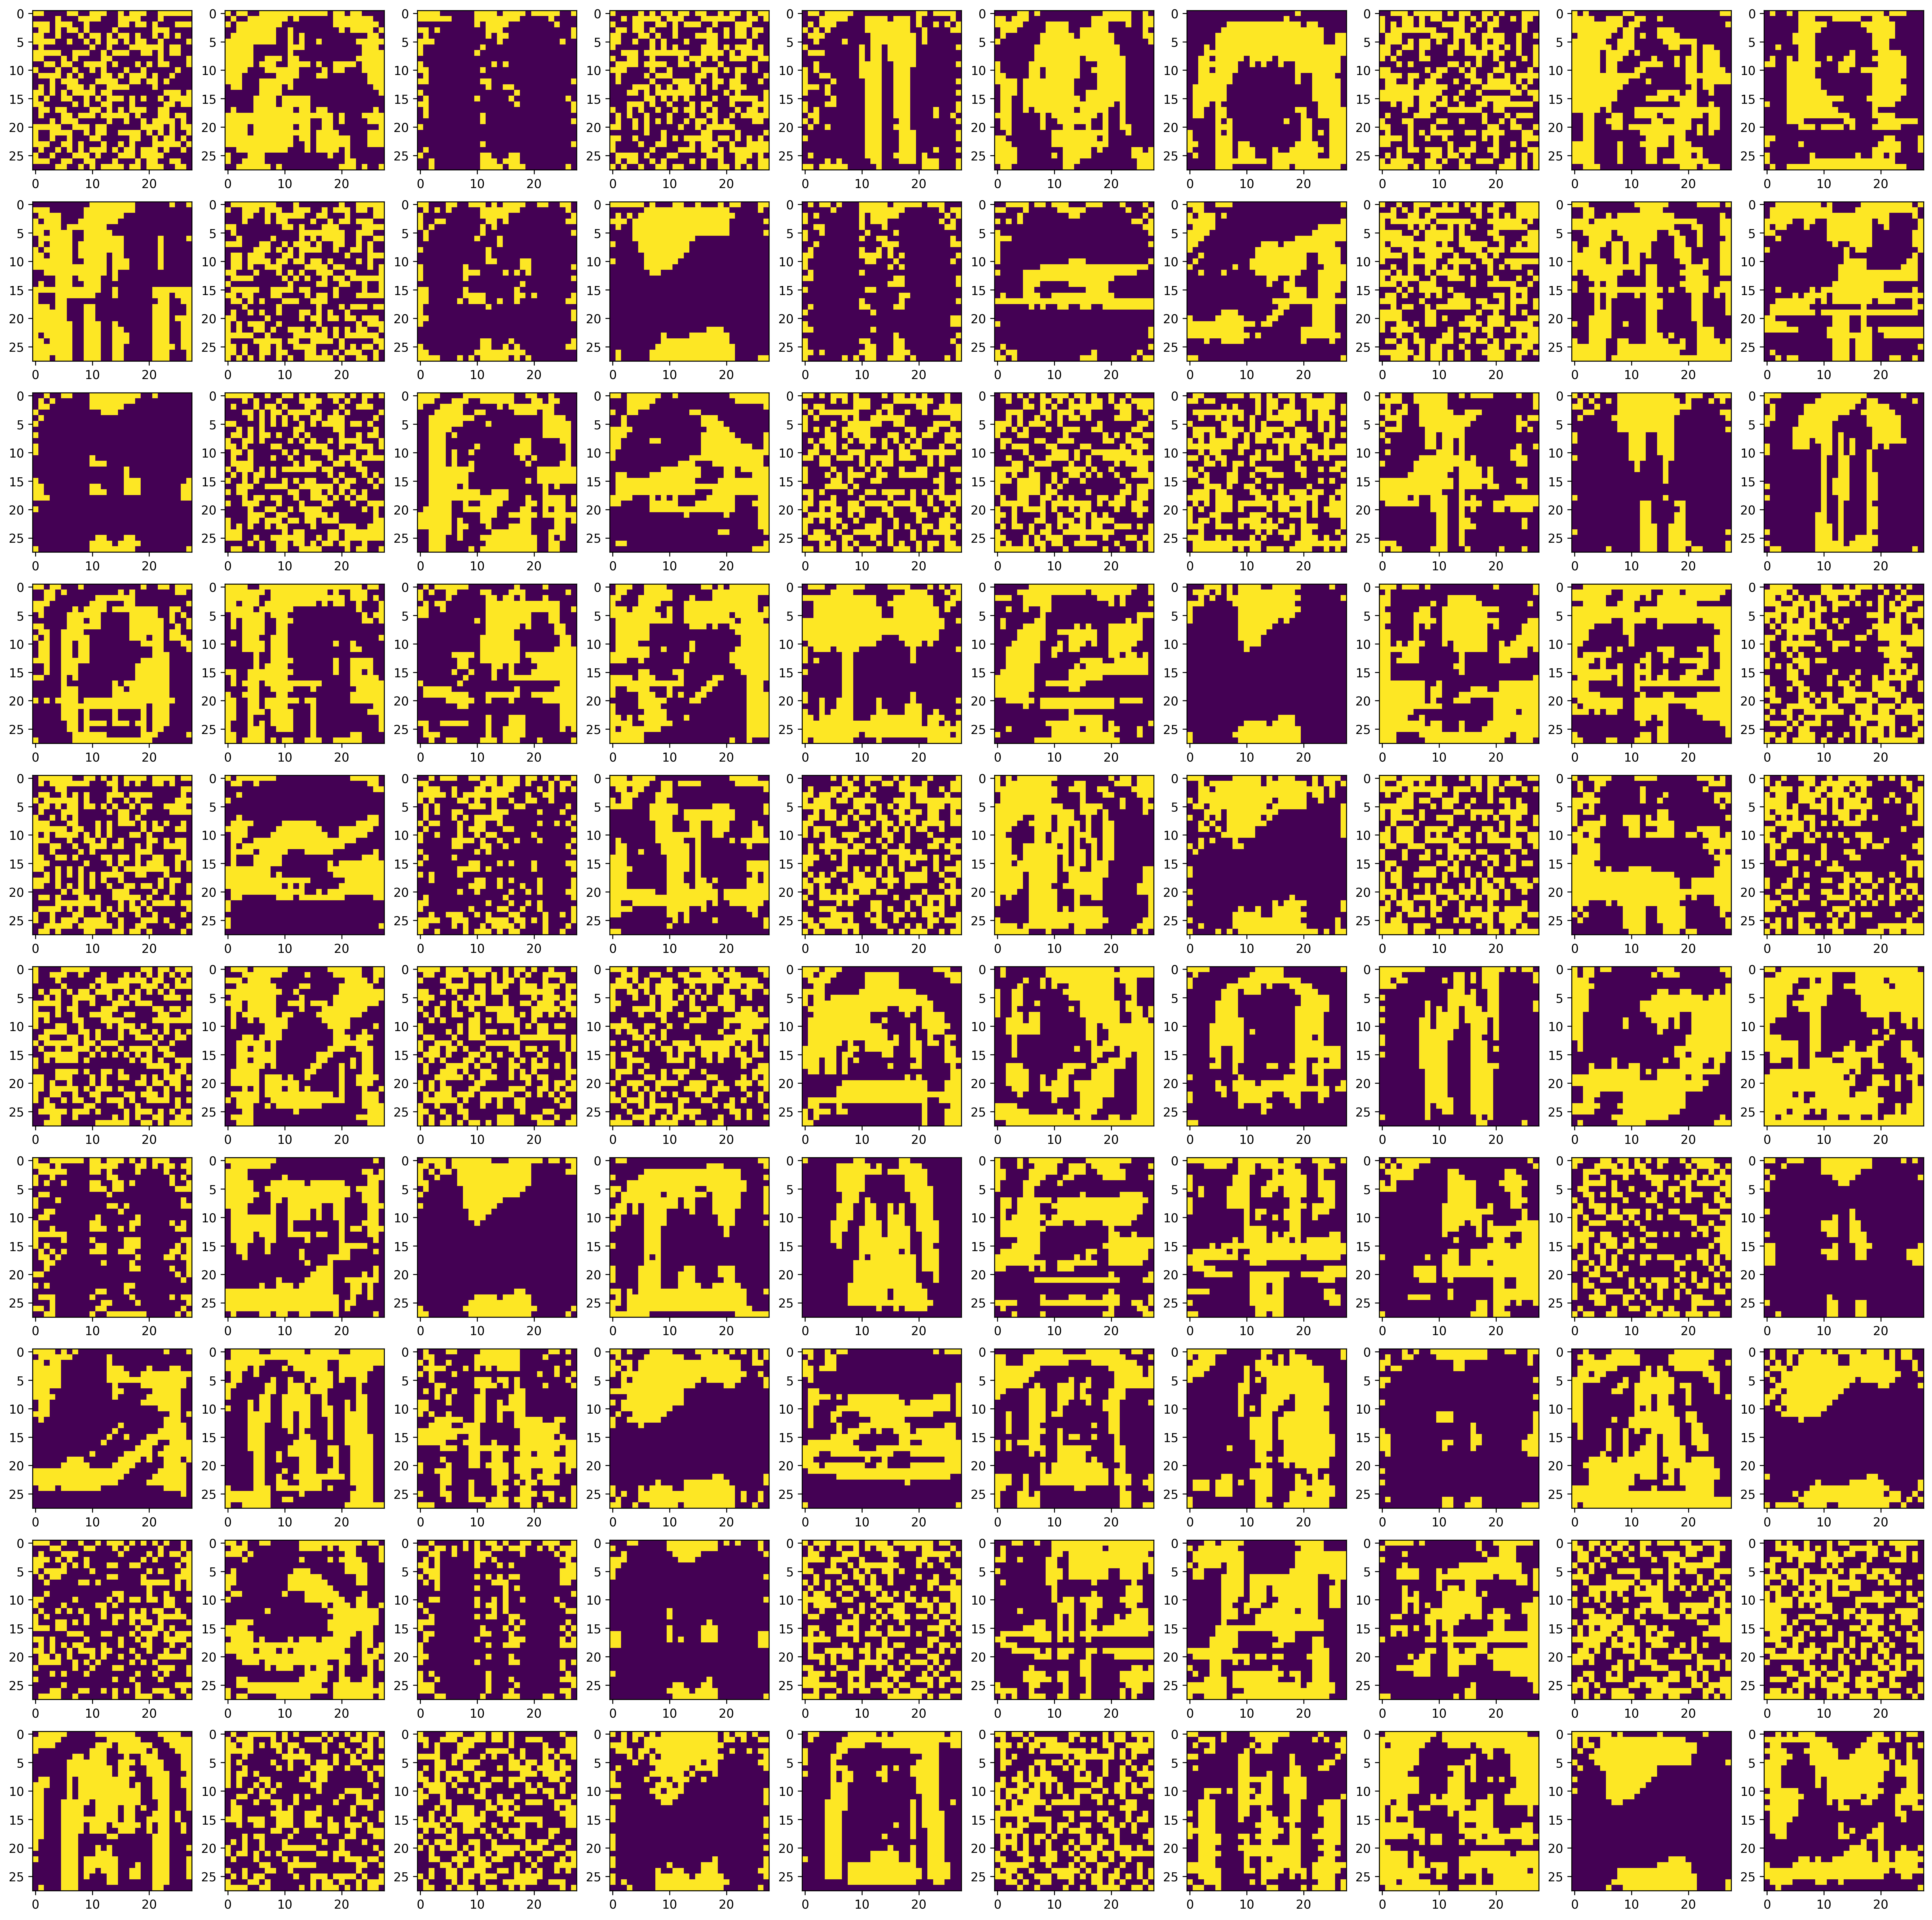

In [58]:
neuron_number = 0

layer = encoder.layers[0].weights
fig, axes = plt.subplots(10,10, figsize=(28,28))


for i,ax in enumerate(axes.flat):
    values = layer.T[100 + i]
    z = ((values / np.sqrt(values.T * values) + 1) * 127)
    ax.imshow(z.reshape(28, 28), cmap="viridis")